In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV
file_path = r'C:\Users\javie\Documentos no sincronizado\Ironhack\Proyecto_internet\Conjunto.csv'

Archivo cargado exitosamente.


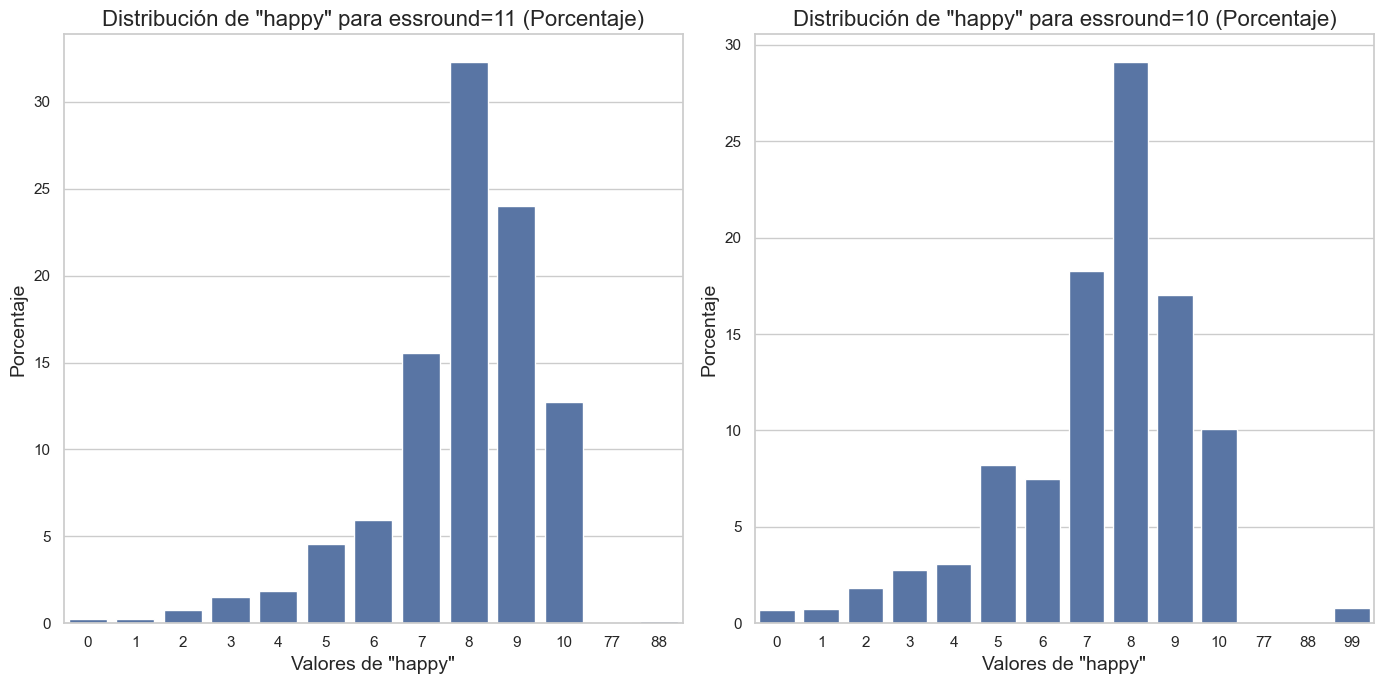

In [ ]:
# Intentar leer el archivo con manejo de errores
try:
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)
    print("Archivo cargado exitosamente.")
    
    # Verificar si la columna 'happy' y 'essround' existen en el archivo
    if 'happy' not in df.columns or 'essround' not in df.columns:
        print("Las columnas 'happy' o 'essround' no se encuentran en el archivo.")
    else:
        # Filtrar los datos para essround=11
        df_essround_11 = df[df['essround'] == 11]
        # Calcular el porcentaje de cada valor de 'happy' para essround=11
        df_essround_11_pct = df_essround_11.groupby(['happy']).size().reset_index(name='count')
        df_essround_11_pct['pct'] = df_essround_11_pct['count'] / df_essround_11_pct['count'].sum() * 100

        # Filtrar los datos para essround=10
        df_essround_10 = df[df['essround'] == 10]
        # Calcular el porcentaje de cada valor de 'happy' para essround=10
        df_essround_10_pct = df_essround_10.groupby(['happy']).size().reset_index(name='count')
        df_essround_10_pct['pct'] = df_essround_10_pct['count'] / df_essround_10_pct['count'].sum() * 100

        # Configuración de estilo de gráficos
        sns.set(style="whitegrid")

        # Crear una figura con dos subgráficas para los gráficos de barras
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))

        # Gráfico de barras para 'happy' con essround=11
        sns.barplot(data=df_essround_11_pct, x='happy', y='pct', ax=axes[0])
        axes[0].set_title('Distribución de "happy" para essround=11 (Porcentaje)', fontsize=16)
        axes[0].set_xlabel('Valores de "happy"', fontsize=14)
        axes[0].set_ylabel('Porcentaje', fontsize=14)

        # Gráfico de barras para 'happy' con essround=10
        sns.barplot(data=df_essround_10_pct, x='happy', y='pct', ax=axes[1])
        axes[1].set_title('Distribución de "happy" para essround=10 (Porcentaje)', fontsize=16)
        axes[1].set_xlabel('Valores de "happy"', fontsize=14)
        axes[1].set_ylabel('Porcentaje', fontsize=14)

        # Ajustar la visualización para que no se solapen
        plt.tight_layout()

        # Mostrar las gráficas
        plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")


Archivo cargado exitosamente.


C:\Users\javie\AppData\Local\Temp\ipykernel_18384\3460742729.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_es['netusoft_category'] = df_es['netusoft'].map(netusoft_mapping)


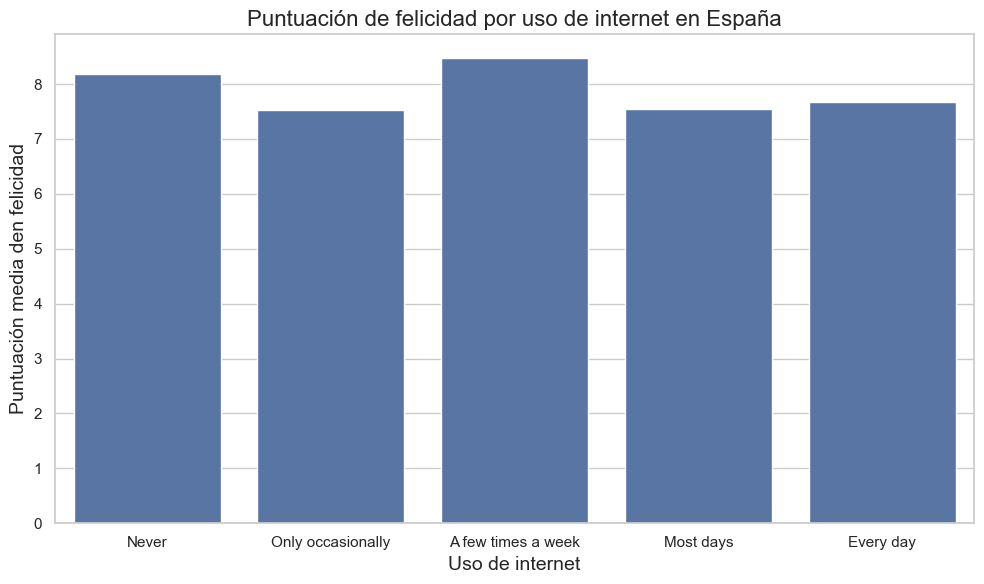

In [ ]:
# Intentar leer el archivo con manejo de errores
try:
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)
    print("Archivo cargado exitosamente.")
    
    # Verificar si las columnas 'happy', 'netusoft' y 'cntry' existen en el archivo
    if 'happy' not in df.columns or 'netusoft' not in df.columns or 'cntry' not in df.columns:
        print("Las columnas 'happy', 'netusoft' o 'cntry' no se encuentran en el archivo.")
    else:
        # Filtrar los datos solo para el país 'ES'
        df_es = df[df['cntry'] == 'ES']

        # Diccionario para mapear los valores de 'netusoft' a sus categorías
        netusoft_mapping = {
            1: 'Never',
            2: 'Only occasionally',
            3: 'A few times a week',
            4: 'Most days',
            5: 'Every day',
            7: 'Refusal*',
            8: 'Don\'t know*',
            9: 'No answer*'
        }

        # Aplicar el mapeo a la columna 'netusoft'
        df_es['netusoft_category'] = df_es['netusoft'].map(netusoft_mapping)

        # Excluir los valores no válidos de 'netusoft' (7, 8, 9)
        df_es = df_es[~df_es['netusoft_category'].isin(['Refusal*', 'Don\'t know*', 'No answer*'])]

        # Calcular la media de 'happy' por cada categoría de 'netusoft'
        df_category_mean = df_es.groupby('netusoft_category')['happy'].mean().reset_index(name='mean_happy')

        # Ordenar las categorías de 'netusoft' por su orden lógico
        order = ['Never', 'Only occasionally', 'A few times a week', 'Most days', 'Every day']
        df_category_mean['netusoft_category'] = pd.Categorical(df_category_mean['netusoft_category'], categories=order, ordered=True)
        df_category_mean = df_category_mean.sort_values('netusoft_category')

        # Crear el gráfico de barras para la media de 'happy' por categoría de 'netusoft'
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df_category_mean, x='netusoft_category', y='mean_happy')

        # Títulos y etiquetas
        plt.title('Puntuación de felicidad por uso de internet en España', fontsize=16)
        plt.xlabel('Uso de internet', fontsize=14)
        plt.ylabel('Puntuación media den felicidad', fontsize=14)

        # Mostrar la gráfica
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")


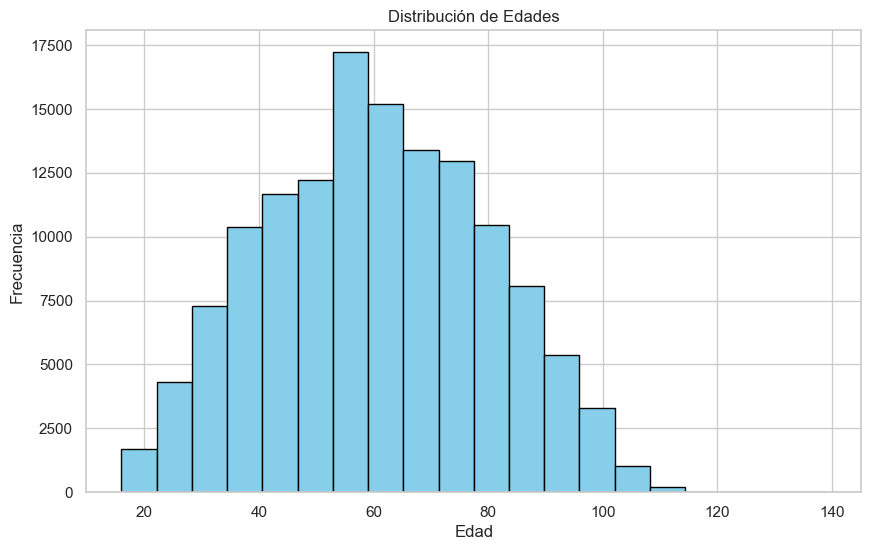

In [ ]:
# Verificar si la columna 'age' tiene datos
if 'age' in df.columns:
    # Eliminar filas con valores NaN en la columna 'age'
    df_cleaned = df.dropna(subset=['age'])
    
    # Crear un histograma de la edad
    plt.figure(figsize=(10, 6))
    plt.hist(df_cleaned['age'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribución de Edades')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
else:
    print("La columna 'age' no está presente en los datos.")


In [43]:
# Crear categorías de edad para la columna 'age_category'
bins = [0, 17, 34, 49, 64, 100]  # Rango de edades
labels = ['0-17', '18-34', '35-49', '50-64', '65+']  # Etiquetas para cada grupo de edad

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# Crear categoría de uso de internet
df['netusoft_category'] = df['netusoft'].map({0: 'No usa', 1: 'Usa'})


Archivo cargado exitosamente.
Total de registros: 135766
Valores nulos en 'yrbrn': 0
Valores no numéricos en 'yrbrn': 0
Años de nacimiento mínimos y máximos: 1885 - 9999
Valores nulos en 'age' después de cálculo: 0


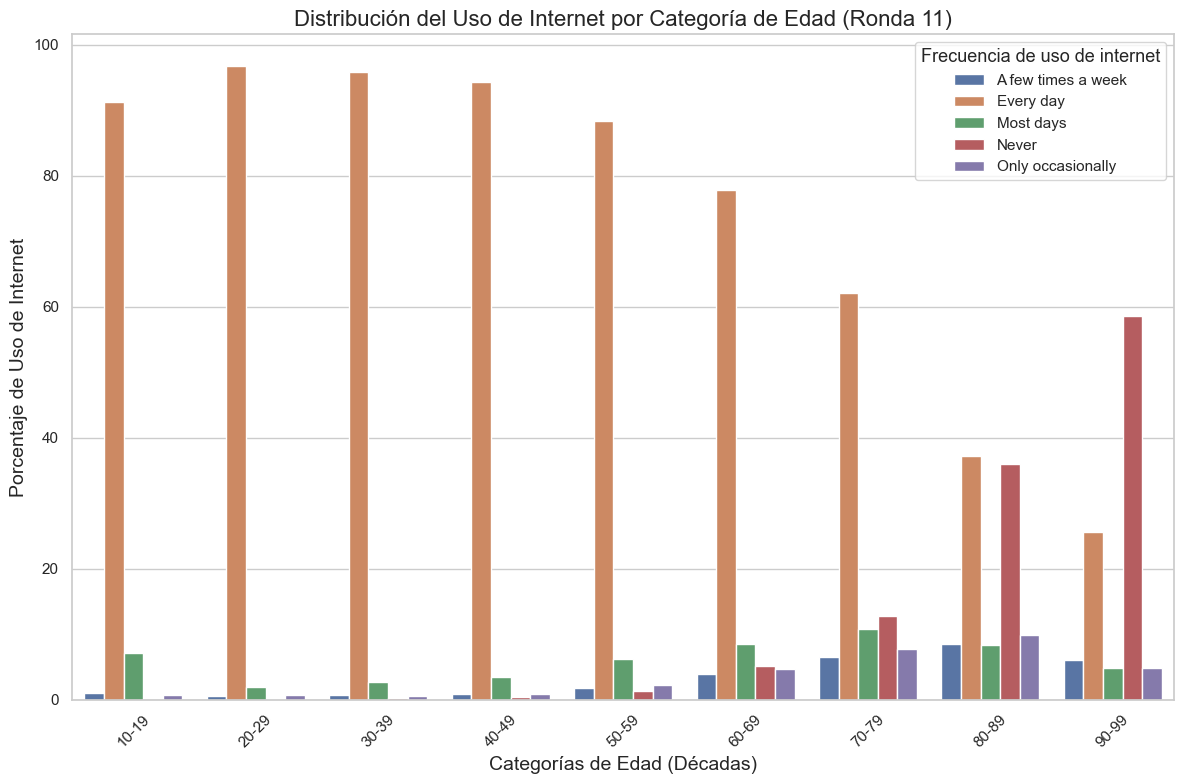

In [ ]:
# Intentar leer el archivo con manejo de errores
try:
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)
    print("Archivo cargado exitosamente.")
    
    # Verificar si las columnas necesarias existen en el archivo
    required_columns = ['yrbrn', 'netusoft', 'cntry', 'essround']
    if not all(col in df.columns for col in required_columns):
        print(f"Las columnas necesarias no están presentes en el archivo.")
    else:
        # Mostrar el número total de registros
        print(f"Total de registros: {len(df)}")

        # Verificar cuántos valores nulos y no numéricos hay en 'yrbrn'
        print(f"Valores nulos en 'yrbrn': {df['yrbrn'].isnull().sum()}")
        print(f"Valores no numéricos en 'yrbrn': {df['yrbrn'].apply(pd.to_numeric, errors='coerce').isnull().sum()}")

        # Asegurarse de que 'yrbrn' no tenga valores nulos ni no numéricos
        df = df[pd.to_numeric(df['yrbrn'], errors='coerce').notnull()]
        df['yrbrn'] = df['yrbrn'].astype(int)

        # Verificar valores extremos de 'yrbrn' (Años de nacimiento demasiado recientes o antiguos)
        print(f"Años de nacimiento mínimos y máximos: {df['yrbrn'].min()} - {df['yrbrn'].max()}")

        # Calcular la edad
        current_year = 2024  # Asumiendo que estamos en el año 2024
        df['age'] = current_year - df['yrbrn']

        # Filtrar registros con edad >= 120
        df = df[df['age'] < 120]
        df = df[df['age'] > 8]

        # Verificar si la edad contiene valores NaN
        print(f"Valores nulos en 'age' después de cálculo: {df['age'].isnull().sum()}")
        df = df.dropna(subset=['age'])

        # Filtrar por la última ronda de la encuesta (essround == 11)
        df = df[df['essround'] == 11]

        # Crear categorías de edad en décadas (0-9, 10-19, 20-29, etc.)
        bins = range(10, df['age'].max() + 10, 10)  # Decenas de años, comenzando desde 10
  # Decenas de años
        labels = [f'{i}-{i+9}' for i in bins[:-1]]  # Etiquetas para las décadas
        df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

        # Mapeo de valores de 'netusoft'
        netusoft_mapping = {
            1: 'Never',
            2: 'Only occasionally',
            3: 'A few times a week',
            4: 'Most days',
            5: 'Every day',
            7: 'Refusal*',
            8: 'Don\'t know*',
            9: 'No answer*'
        }
        df['netusoft_category'] = df['netusoft'].map(netusoft_mapping)

        # Eliminar respuestas no deseadas en 'netusoft_category'
        df = df[~df['netusoft_category'].isin(['Refusal*', 'Don\'t know*', 'No answer*'])]

        # Filtrar valores no mapeados
        df = df.dropna(subset=['netusoft_category'])

        # Obtener el uso de internet por categoría de edad
        netusoft_category_counts = df.groupby(['age_category', 'netusoft_category']).size().reset_index(name='count')

        # Calcular el porcentaje de uso de internet dentro de cada categoría de edad
        netusoft_category_counts['pct'] = netusoft_category_counts.groupby('age_category')['count'].transform(lambda x: x / x.sum() * 100)

        # Configuración de estilo de gráficos
        sns.set(style="whitegrid")

        # Crear gráfico de barras para uso de internet por categorías de edad
        plt.figure(figsize=(12, 8))
        sns.barplot(data=netusoft_category_counts, x='age_category', y='pct', hue='netusoft_category')
        plt.title('Distribución del Uso de Internet por Categoría de Edad (Ronda 11)', fontsize=16)
        plt.xlabel('Categorías de Edad (Décadas)', fontsize=14)
        plt.ylabel('Porcentaje de Uso de Internet', fontsize=14)
        # Cambiar el título de la leyenda
        plt.legend(title='Frecuencia de uso de internet', title_fontsize='13', fontsize='11')

        plt.xticks(rotation=45)
        plt.tight_layout()

        # Mostrar el gráfico
        plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")


Valores únicos en 'essround' después de limpiar: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
Valores únicos en 'inmdisc' después de limpiar: [ 1.  2.  8.  7. nan]
Total de registros filtrados: 12248
Primeros registros filtrados:
      essround  inmdisc  happy
51007        5      1.0      8
51008        5      1.0      7
51009        5      1.0      8
51010        5      1.0      7
51011        5      1.0      8
Total de registros después de eliminar nulos en 'happy': 12248
Resumen de la media de felicidad por grupo de 'inmdisc':
  inmdisc     happy
0     Yes  7.884388
1      No  6.900000


C:\Users\javie\AppData\Local\Temp\ipykernel_18384\3573790810.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='inmdisc', y='happy', data=happiness_mean, palette='coolwarm')


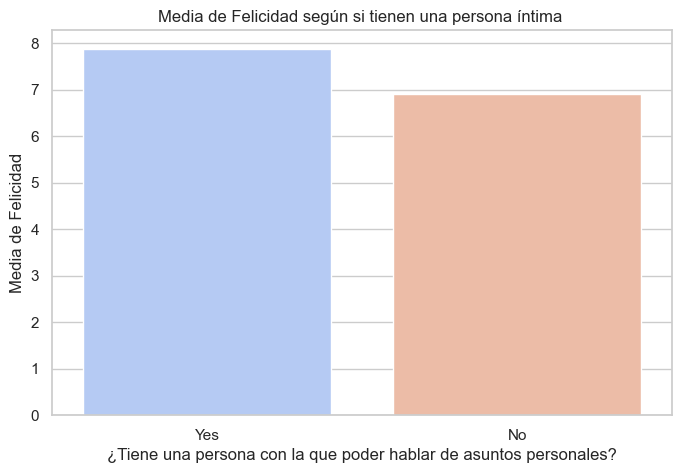

In [83]:
# Asegurarnos de que 'essround' no tenga espacios o caracteres adicionales
df['essround'] = df['essround'].str.strip()  # Eliminamos cualquier espacio en blanco alrededor

# Verificar los valores únicos de 'essround' y 'inmdisc' después de limpiar
print(f"Valores únicos en 'essround' después de limpiar: {df['essround'].unique()}")
print(f"Valores únicos en 'inmdisc' después de limpiar: {df['inmdisc'].unique()}")

# Asegurarnos de que 'essround' sea de tipo cadena y 'inmdisc' sea numérico
df['essround'] = df['essround'].astype(str)
df['inmdisc'] = pd.to_numeric(df['inmdisc'], errors='coerce')

# Filtrar por 'essround' == '6' y los valores 1 y 2 de 'inmdisc'
df_filtered = df[df['essround'] == '5']
df_filtered = df_filtered[df_filtered['inmdisc'].isin([1, 2])]

# Mostrar una muestra de los registros filtrados para depuración
print(f"Total de registros filtrados: {len(df_filtered)}")
print(f"Primeros registros filtrados:\n{df_filtered[['essround', 'inmdisc', 'happy']].head()}")

# Asegurarnos de que 'happy' no tenga valores nulos
df_filtered = df_filtered.dropna(subset=['happy'])

# Verificar si después de eliminar los nulos tenemos datos para la media
print(f"Total de registros después de eliminar nulos en 'happy': {len(df_filtered)}")

# Agrupar por 'inmdisc' y calcular la media de 'happy'
happiness_mean = df_filtered.groupby('inmdisc')['happy'].mean().reset_index()

# Mapear los valores de 'inmdisc' a etiquetas más comprensibles
happiness_mean['inmdisc'] = happiness_mean['inmdisc'].map({1: 'Yes', 2: 'No'})

# Mostrar los resultados antes de graficar
print(f"Resumen de la media de felicidad por grupo de 'inmdisc':\n{happiness_mean}")

# Crear el gráfico de barras si hay datos para graficar
if not happiness_mean.empty:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='inmdisc', y='happy', data=happiness_mean, palette='coolwarm')

    # Personalización del gráfico
    plt.title('Media de Felicidad según si tienen una persona íntima ')
    plt.xlabel('¿Tiene una persona con la que poder hablar de asuntos personales?')
    plt.ylabel('Media de Felicidad')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No hay datos suficientes para graficar.")


Valores únicos en 'essround' después de limpiar: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']
Valores únicos en 'sclmeet' después de limpiar: [ 6  7  4  5  2  3  1 88 77 99]
Total de registros filtrados: 8380
Primeros registros filtrados:
       essround  sclmeet  happy
127378       11        6      8
127379       11        5      8
127380       11        6      9
127381       11        7      9
127382       11        5     10
Total de registros después de eliminar nulos en 'happy': 8380
Resumen de la media de felicidad por frecuencia de encuentro social:
                  sclmeet     happy
0                   Never  7.873563
1  Less than once a month  7.326923
2            Once a month  7.624473
3   Several times a month  8.054470
4             Once a week  7.964198
5    Several times a week  8.146226
6               Every day  8.249762


C:\Users\javie\AppData\Local\Temp\ipykernel_18384\1248719326.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sclmeet', y='happy', data=happiness_mean, palette='coolwarm')


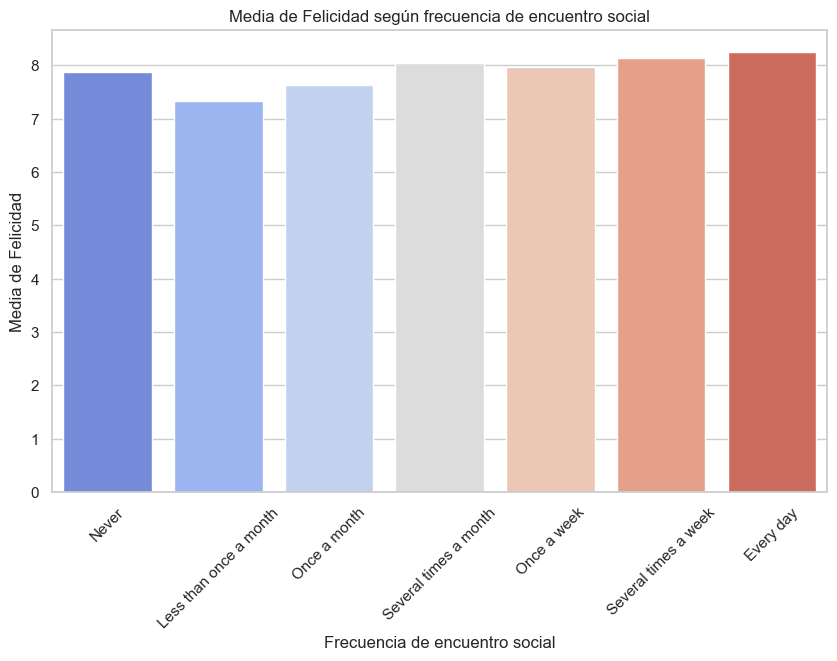

In [84]:
# Asegurarnos de que 'essround' no tenga espacios o caracteres adicionales
df['essround'] = df['essround'].str.strip()  # Eliminamos cualquier espacio en blanco alrededor

# Verificar los valores únicos de 'essround' y 'sclmeet' después de limpiar
print(f"Valores únicos en 'essround' después de limpiar: {df['essround'].unique()}")
print(f"Valores únicos en 'sclmeet' después de limpiar: {df['sclmeet'].unique()}")

# Asegurarnos de que 'essround' sea de tipo cadena y 'sclmeet' sea numérico
df['essround'] = df['essround'].astype(str)
df['sclmeet'] = pd.to_numeric(df['sclmeet'], errors='coerce')

# Filtrar por 'essround' == '11' y los valores válidos de 'sclmeet' (1 a 7)
df_filtered = df[df['essround'] == '11']
df_filtered = df_filtered[df_filtered['sclmeet'].isin([1, 2, 3, 4, 5, 6, 7])]

# Mostrar una muestra de los registros filtrados para depuración
print(f"Total de registros filtrados: {len(df_filtered)}")
print(f"Primeros registros filtrados:\n{df_filtered[['essround', 'sclmeet', 'happy']].head()}")

# Asegurarnos de que 'happy' no tenga valores nulos
df_filtered = df_filtered.dropna(subset=['happy'])

# Verificar si después de eliminar los nulos tenemos datos para la media
print(f"Total de registros después de eliminar nulos en 'happy': {len(df_filtered)}")

# Agrupar por 'sclmeet' y calcular la media de 'happy'
happiness_mean = df_filtered.groupby('sclmeet')['happy'].mean().reset_index()

# Mapear los valores de 'sclmeet' a etiquetas más comprensibles
happiness_mean['sclmeet'] = happiness_mean['sclmeet'].map({
    1: 'Never',
    2: 'Less than once a month',
    3: 'Once a month',
    4: 'Several times a month',
    5: 'Once a week',
    6: 'Several times a week',
    7: 'Every day'
})

# Mostrar los resultados antes de graficar
print(f"Resumen de la media de felicidad por frecuencia de encuentro social:\n{happiness_mean}")

# Crear el gráfico de barras si hay datos para graficar
if not happiness_mean.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='sclmeet', y='happy', data=happiness_mean, palette='coolwarm')

    # Personalización del gráfico
    plt.title('Media de Felicidad según frecuencia de encuentro social')
    plt.xlabel('Frecuencia de encuentro social')
    plt.ylabel('Media de Felicidad')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No hay datos suficientes para graficar.")
